Name: Kaan Canbolat

ID: 151101075

Course: BIL570 /BIL470

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from LR import LinearRegression

# Exploratory Data Analysis (EDA)

# Train the classifier

In [2]:
clf = LinearRegression(learning_rate=0.000005, epoch=1000)

In [3]:
bmi = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv");
#discription of columns
bmi= bmi.drop(columns="Gender");

height= bmi["Height"].describe();
weight= bmi["Weight"].describe();
index= bmi["Index"].describe();
print(height)
print(weight)
print(index)
display(bmi[bmi.duplicated()])
display(bmi.duplicated().sum())


count    500.000000
mean     169.944000
std       16.375261
min      140.000000
25%      156.000000
50%      170.500000
75%      184.000000
max      199.000000
Name: Height, dtype: float64
count    500.000000
mean     106.000000
std       32.382607
min       50.000000
25%       80.000000
50%      106.000000
75%      136.000000
max      160.000000
Name: Weight, dtype: float64
count    500.000000
mean       3.748000
std        1.355053
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Index, dtype: float64


,Height,Weight,Index
20,157,110,5
162,192,101,3
187,182,84,3
197,177,117,4
260,159,104,5
310,171,147,5
321,181,111,4
327,167,85,4
334,157,56,2
347,162,58,2


24

Split dataset to train and test

In [4]:
X=bmi.values.tolist();
boy=[];
kilo=[];
z=[];
for row in X:
    z.append(int(row[2]));   
    del row[2];
    
X=pd.Series(X);
z=pd.Series(z);
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.5, shuffle=True);

y_train=[];
x_train=[];
for row in X_train:
    y_train.append(int(row[1]))
    x_train.append(int(row[0]))
    del row[1];
    del row[0];

y_test=[];
x_test=[];
for row in X_test:
    y_test.append(int(row[1]))
    x_test.append(int(row[0]))
    del row[1];
    del row[0];

z_train_list=z_train.values.tolist();
z_test_list=z_test.values.tolist();


### Train The Classifier

R2 Accuracy and Training Loss Graph


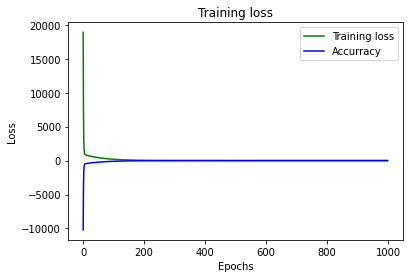

In [5]:
myepoch,myloss,myRsquaredAccurracy,newm1,newm2,newbias,m1list,m2list,biaslist=clf.fit(x_train,y_train,z_train_list);
print("R2 Accuracy and Training Loss Graph")
plt.plot(myepoch, myloss, 'g', label='Training loss')
plt.plot(myepoch, myRsquaredAccurracy, 'b', label='Accurracy')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Predict Class of Test values

In [7]:
yhat = clf.predict(x_test,y_test)
print("Test Features Expected Classification")
print(z_test_list)
print("Prediction")
rounded=[]
for i in range(len(yhat)):
    rounded.append(round(yhat[i]))
print(rounded);
xhat = clf.predict(x_train,y_train)
print("Train Features Expected Classification")
print(z_train_list)
print("Prediction")
rounded=[]
for i in range(len(xhat)):
    rounded.append(round(xhat[i]))
print(rounded);


Test Features Expected Classification
[2, 4, 4, 2, 3, 4, 5, 1, 3, 2, 4, 2, 5, 5, 5, 5, 2, 3, 5, 4, 4, 0, 5, 2, 2, 2, 5, 5, 2, 4, 4, 4, 2, 5, 4, 4, 5, 4, 2, 4, 4, 5, 4, 5, 5, 4, 5, 2, 5, 3, 5, 3, 2, 1, 2, 4, 4, 3, 5, 3, 4, 4, 5, 0, 5, 2, 2, 4, 5, 5, 5, 4, 5, 3, 2, 5, 5, 5, 1, 4, 2, 5, 5, 5, 3, 1, 3, 4, 3, 5, 3, 3, 5, 4, 5, 4, 5, 3, 4, 5, 2, 0, 4, 5, 3, 2, 4, 0, 0, 2, 4, 3, 5, 5, 5, 5, 0, 2, 4, 5, 5, 5, 3, 5, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 1, 5, 2, 4, 4, 1, 2, 4, 5, 4, 0, 4, 5, 5, 3, 5, 3, 5, 5, 3, 5, 5, 5, 5, 5, 5, 3, 2, 4, 4, 3, 3, 4, 2, 4, 1, 1, 3, 5, 4, 2, 3, 3, 2, 5, 5, 3, 5, 2, 3, 4, 5, 0, 5, 5, 5, 4, 4, 5, 3, 5, 5, 5, 2, 5, 5, 5, 2, 3, 3, 4, 4, 4, 2, 5, 5, 5, 5, 5, 3, 5, 4, 4, 2, 3, 5, 2, 4, 5, 4, 5, 3, 4, 5, 4, 3, 5, 4, 3, 4, 3, 2, 3, 2, 5, 5, 3, 4, 5, 5, 5, 5, 4, 3, 3, 5]
Prediction
[3, 5, 5, 2, 2, 4, 6, 2, 4, 3, 4, 2, 4, 5, 5, 5, 2, 2, 6, 4, 3, 1, 5, 3, 2, 2, 5, 5, 2, 4, 3, 5, 2, 6, 4, 4, 5, 4, 2, 4, 3, 6, 3, 6, 5, 4, 5, 3, 4, 3, 5, 2, 3, 2, 2, 2, 4, 2, 6, 2, 4, 3, 5, 2, 5, 3, 2

# Results

### Accuracy

R2 Accuracy and Loss Graph with Test Data


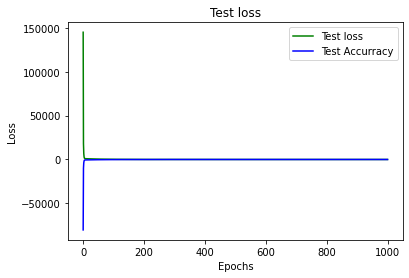

In [8]:
##we are getting m1,m2,bias to lists each epoch and applying on test data for accurracy and loss
testAccuracy=[]
myepoch=[]
myloss=[]

for i in range(len(m1list)):
    predictList=[]
    for j in range(len(x_test)):
        predictList.append(m1list[i]*x_test[j]+m2list[i]*y_test[j]+biaslist[i])
    
    loss=0
    mean=0
    for j in range(len(predictList)):
        loss+=(predictList[j]-z_test_list[j])**2
        
    mean=sum(z_test_list)/len(z_test_list)
    sumofsquares = 0
    sumofresiduals = 0
        
    for j in range(len(z_test_list)) :
        sumofsquares += (z_test_list[j] - mean) ** 2
        sumofresiduals += (z_test_list[j] - predictList[j]) **2
        
    
    score  = 1 - (sumofresiduals/sumofsquares)
    testAccuracy.append(score)
    loss=loss/len(predictList)
    myepoch.append(i)
    myloss.append(loss)



print("R2 Accuracy and Loss Graph with Test Data")
plt.plot(myepoch, myloss, 'g', label='Test loss')
plt.plot(myepoch, testAccuracy, 'b', label='Test Accurracy')
plt.title('Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


R*2 Test Results

In [9]:
from sklearn.metrics import r2_score

r2=r2_score(z_test_list,yhat)
print(r2)

0.6536342798100041


R*2 Train Results

In [10]:
r2=r2_score(z_train_list,xhat)
print(r2)

0.6532159371439991


Baslangicta yüksek m1 m2 bias değerleriyle başladığımızdan ve verinin azlığından dolayı bu şekilde bir sonuç çıkmakta